In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# generate training data & normalize
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns


## Model Implementation

In [ ]:
# cost functino
# Here we calculate the cost of our hypothesis based on a thetas array 

def cost1(X, y, thetas):
    # hypothesis
    hip = X @ thetas.T # using @ as matmul
    m = 2 * len(X) # m = 2*len(X)
    to_sum = np.power(hipos - y, 2) # inner part of summaroty
    
    return np.sum(to_sum) / m

In [ ]:
# Derivate calculator
# Here we calculate the derivate from the cost function

def derivate(X, y, thetas):
    hip = X @ thetas.T
    to_sum = (hips - y).T

    return (np.matmul(to_sum, X) / m ).T

In [ ]:
# Gradient descent implementation
# a = learning rate
# ite = iterations
def grdDsc(X, y, thetas, ite, a):
    
    cost_arr = np.Zeros(ite)

    ths = np.asarray(thetas, dtype='float64').reshape(len(thetas),1)
    
    for i in range(ite):
        
        ths -= a * derivate(X,y,ths)
        cost = cost1(X,y,ths)
        
        ths.append("H(" + str(i) + ") =" + str(ths) + " costo -> " + str(cost))
        
    return (ths,cost_arr)


### Data Import & Basic Conversion and Analysis

In [7]:
# load data
# 1. LA
la = pd.read_csv('./la.csv')
# 2. NY
ny = pd.read_csv('./ny.csv')


In [8]:
la.head()

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/08/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [9]:
ny.head()

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,NEW YORK,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,150,170,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,PUMPKINS,NEW YORK,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,150,170,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,PUMPKINS,NEW YORK,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,130,150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,PUMPKINS,NEW YORK,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,130,150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,PUMPKINS,NEW YORK,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,120,140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [10]:
la.columns

Index(['Commodity Name', 'City Name', 'Type', 'Package', 'Variety',
       'Sub Variety', 'Grade', 'Date', 'Low Price', 'High Price', 'Mostly Low',
       'Mostly High', 'Origin', 'Origin District', 'Item Size', 'Color',
       'Environment', 'Unit of Sale', 'Quality', 'Condition', 'Appearance',
       'Storage', 'Crop', 'Repack', 'Trans Mode'],
      dtype='object')

In [11]:
ny.columns

Index(['Commodity Name', 'City Name', 'Type', 'Package', 'Variety',
       'Sub Variety', 'Grade', 'Date', 'Low Price', 'High Price', 'Mostly Low',
       'Mostly High', 'Origin', 'Origin District', 'Item Size', 'Color',
       'Environment', 'Unit of Sale', 'Quality', 'Condition', 'Appearance',
       'Storage', 'Crop', 'Repack', 'Trans Mode'],
      dtype='object')

In [16]:
# we can just concatenate data since they have the same columns
joint = pd.concat([la, ny])
joint.head()

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/08/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [17]:
joint.tail()

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
107,PUMPKINS,NEW YORK,NaN,bushel cartons,MINIATURE,NaN,NaN,09/09/2017,32.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
108,PUMPKINS,NEW YORK,NaN,1 1/9 bushel crates,MINIATURE,ROUND TYPE,NaN,10/08/2016,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
109,PUMPKINS,NEW YORK,NaN,1 1/9 bushel crates,MINIATURE,ROUND TYPE,NaN,10/08/2016,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
110,PUMPKINS,NEW YORK,NaN,1 1/9 bushel crates,MINIATURE,ROUND TYPE,NaN,10/15/2016,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
111,PUMPKINS,NEW YORK,NaN,1 1/9 bushel crates,MINIATURE,ROUND TYPE,NaN,10/15/2016,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [25]:
# simple normalizatino
max_lowPrice = joint['Low Price'].max()
max_highPrice = joint['High Price'].max()
max_lowPrice, max_highPrice

(275.0, 375.0)

In [28]:
joint['High Price'] = joint['High Price']  / max_Price 

In [27]:
joint['Low Price'] = joint['Low Price']  / max_lowPrice 

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,0.001587,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,0.001587,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,0.001587,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,0.001587,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/08/2016,0.001587,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,PUMPKINS,NEW YORK,NaN,bushel cartons,MINIATURE,NaN,NaN,09/09/2017,0.000423,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
108,PUMPKINS,NEW YORK,NaN,1 1/9 bushel crates,MINIATURE,ROUND TYPE,NaN,10/08/2016,0.000238,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
109,PUMPKINS,NEW YORK,NaN,1 1/9 bushel crates,MINIATURE,ROUND TYPE,NaN,10/08/2016,0.000238,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
110,PUMPKINS,NEW YORK,NaN,1 1/9 bushel crates,MINIATURE,ROUND TYPE,NaN,10/15/2016,0.000238,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [29]:
joint

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,0.001587,0.346667,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,0.001587,0.346667,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,0.001587,0.346667,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,0.001587,0.346667,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/08/2016,0.001587,0.346667,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,PUMPKINS,NEW YORK,NaN,bushel cartons,MINIATURE,NaN,NaN,09/09/2017,0.000423,0.085333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
108,PUMPKINS,NEW YORK,NaN,1 1/9 bushel crates,MINIATURE,ROUND TYPE,NaN,10/08/2016,0.000238,0.048000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
109,PUMPKINS,NEW YORK,NaN,1 1/9 bushel crates,MINIATURE,ROUND TYPE,NaN,10/08/2016,0.000238,0.048000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
110,PUMPKINS,NEW YORK,NaN,1 1/9 bushel crates,MINIATURE,ROUND TYPE,NaN,10/15/2016,0.000238,0.048000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


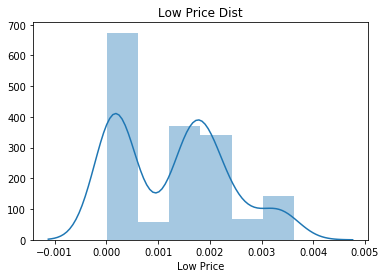

In [31]:
sns.distplot(joint['Low Price']).set_title("Low Price Dist")
plt.show()

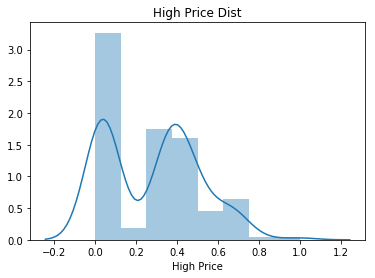

In [32]:
sns.distplot(joint['High Price']).set_title("High Price Dist")
plt.show()

In [33]:
joint['Item Size']

0      lge
1      med
2      lge
3      med
4      lge
      ... 
107    sml
108    med
109    sml
110    med
111    sml
Name: Item Size, Length: 174, dtype: object

In [47]:
joint['Item Size'] = joint['Item Size'].astype('category')
joint['Item Size'] = joint['Item Size'].cat.codes

In [48]:
workData = joint[['Low Price','High Price','Item Size']].copy()

In [49]:
workData

,Low Price,High Price,Item Size
0,0.001587,0.346667,1
1,0.001587,0.346667,2
2,0.001587,0.346667,1
3,0.001587,0.346667,2
4,0.001587,0.346667,1
...,...,...,...
107,0.000423,0.085333,4
108,0.000238,0.048000,2
109,0.000238,0.048000,4
110,0.000238,0.048000,2


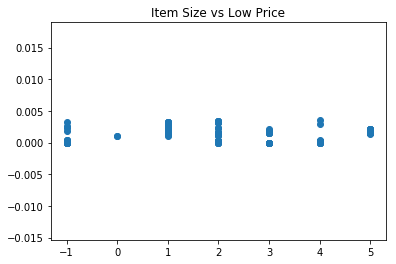

In [50]:
plt.scatter( workData['Item Size'], workData['Low Price'])
plt.title("Item Size vs Low Price")
plt.show()

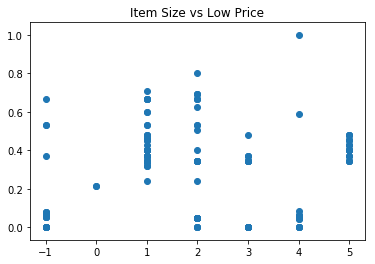

In [51]:
plt.scatter( workData['Item Size'], workData['High Price'])
plt.title("Item Size vs Low Price")
plt.show()